# APT

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [5]:
df=pd.read_excel("APT.xlsx")

## Retornos

In [6]:
### Calculamos retornos y diferecias. 
df_retornos=(
    df.assign(
    Date=lambda x: pd.to_datetime(x['Date']),
    dIPC=lambda x: x['IPC']-x['IPC'].shift(1),
    dIMACEC=lambda x: x['IMACEC']-x['IMACEC'].shift(1),
    rTC=lambda x: np.log(x['TC']/x['TC'].shift(1)),
    rBCP=lambda x: np.log(x['BCP_10']/x['BCP_10'].shift(1)),
    rIPSA=lambda x: np.log(x['IPSA']/x['IPSA'].shift(1))-np.log(x['BCP_10']/x['BCP_10'].shift(1)),
    rCEN=lambda x: np.log(x['Close']/x['Close'].shift(1))-np.log(x['BCP_10']/x['BCP_10'].shift(1))
    )\
    .set_index('Date')\
    .drop(df.columns[df.columns!='Date'],axis=1)\
    .dropna()
)

## Series

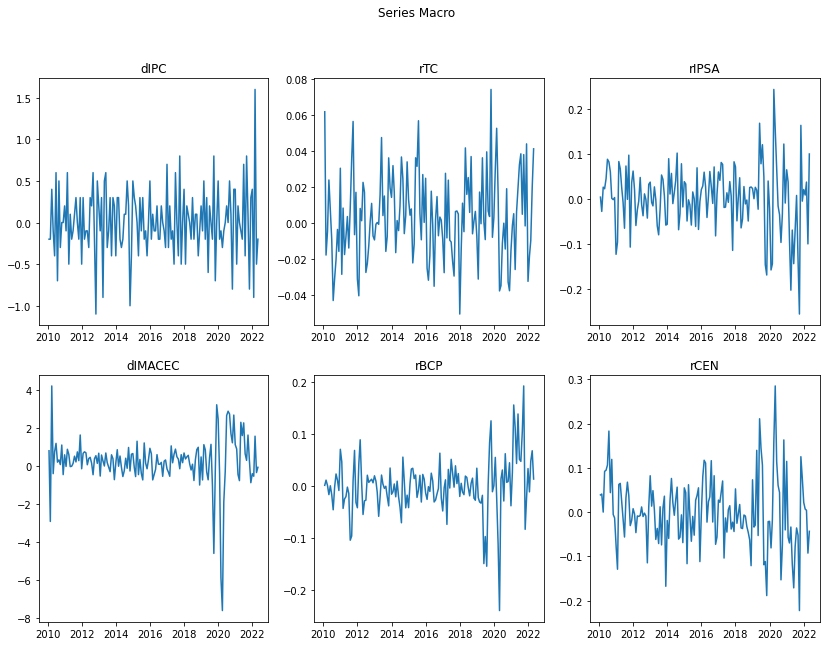

In [7]:
fig, ax = plt.subplots(2, 3)
fig.suptitle('Series Macro')
fig.set_figwidth(14)
fig.set_figheight(10)
j=0
k=0
for i in df_retornos.columns:
    ax[j,k].plot(df_retornos.index, df_retornos[i])
    ax[j,k].set_title(i)
    j=j+1
    if j==2:
        k=k+1
        j=0

## Describe

In [8]:
df_retornos.describe()

,dIPC,dIMACEC,rTC,rBCP,rIPSA,rCEN
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,0.004730,0.237118,0.003572,0.000238,0.002058,0.000374
std,0.400397,1.299120,0.023562,0.052512,0.071773,0.078385
min,-1.100000,-7.597527,-0.050548,-0.240375,-0.256705,-0.222497
25%,-0.200000,-0.258121,-0.010762,-0.022411,-0.034312,-0.045840
50%,0.000000,0.270496,0.001793,0.000344,0.006033,-0.006340
75%,0.300000,0.684217,0.017302,0.021334,0.041664,0.044257
max,1.600000,4.202651,0.074151,0.192721,0.243703,0.285146


## Histogram

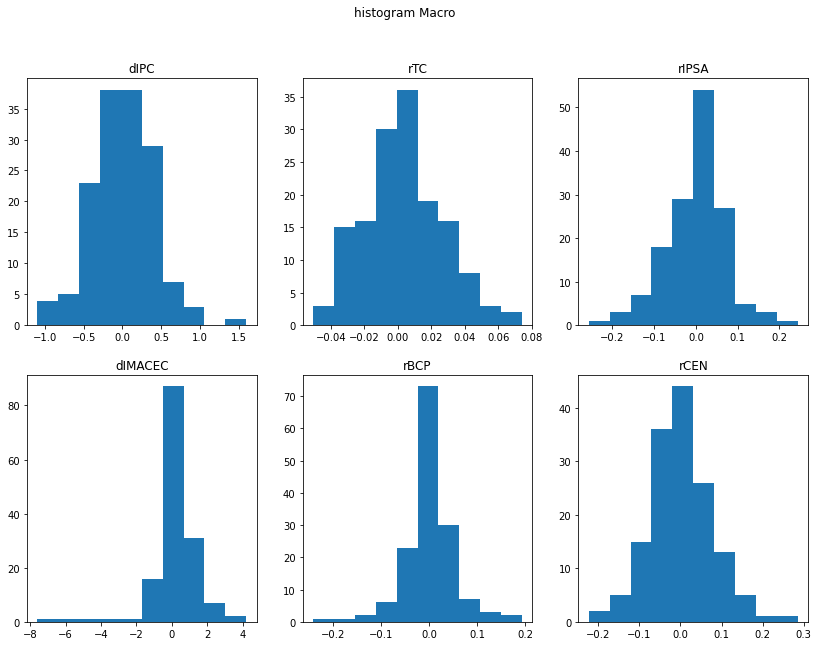

In [9]:
fig, ax = plt.subplots(2, 3)
fig.suptitle('histogram Macro')
fig.set_figwidth(14)
fig.set_figheight(10)
j=0
k=0
for i in df_retornos.columns:
    ax[j,k].hist(df_retornos[i])
    ax[j,k].set_title(i)
    j=j+1
    if j==2:
        k=k+1
        j=0

## Correlation matrix

In [10]:
corr=df_retornos.corr() ## correlation matrix

In [11]:
mask = np.triu(np.ones_like(corr, dtype=bool)) ## lower triangle mask

<AxesSubplot:>

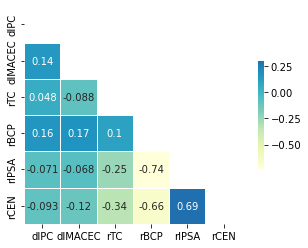

In [12]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

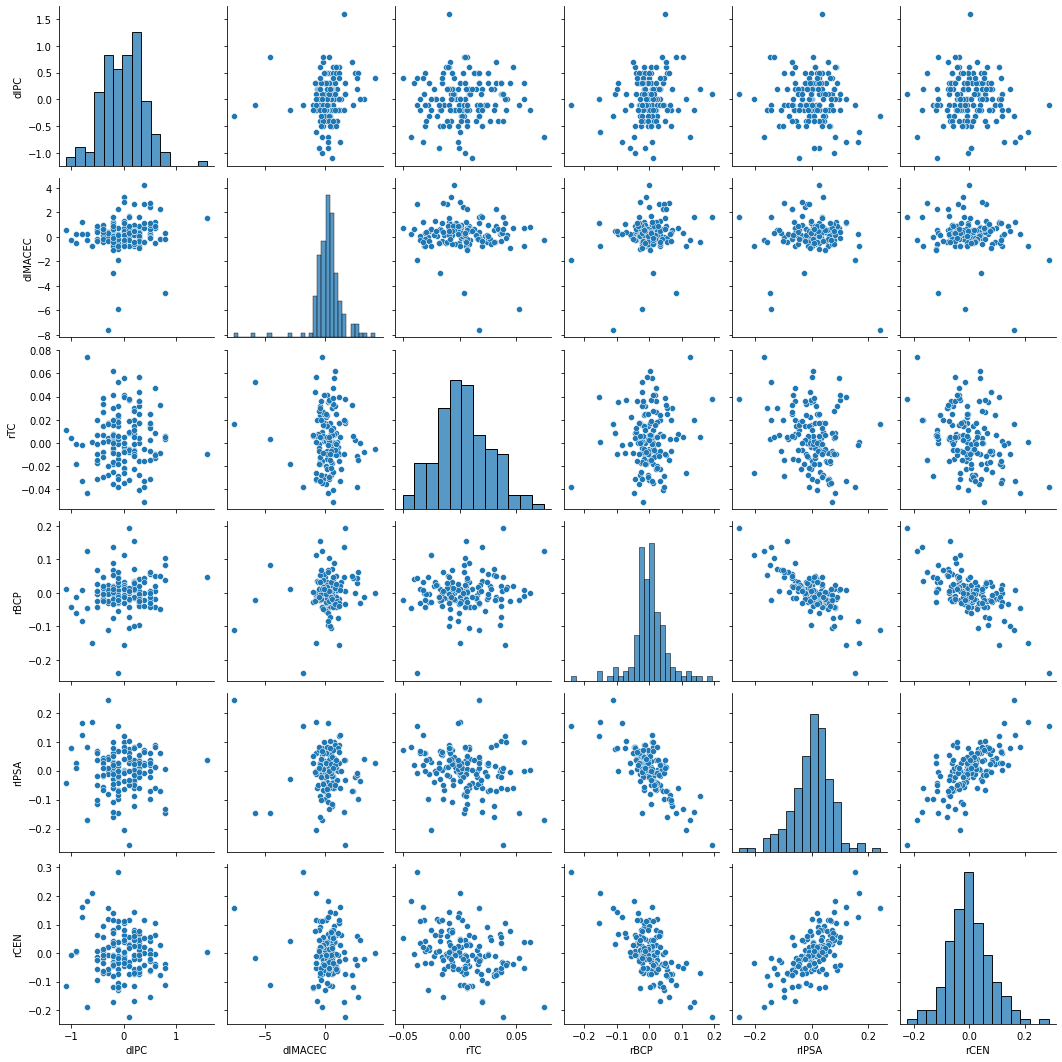

In [13]:
sns.pairplot(df_retornos)

A priori ya notamos que explican repoco los agregados macro los retornos de cencosud, una vez que controlemos por retorno de mercado poco debería quedar para explicar.

## Autocorrelation plot.

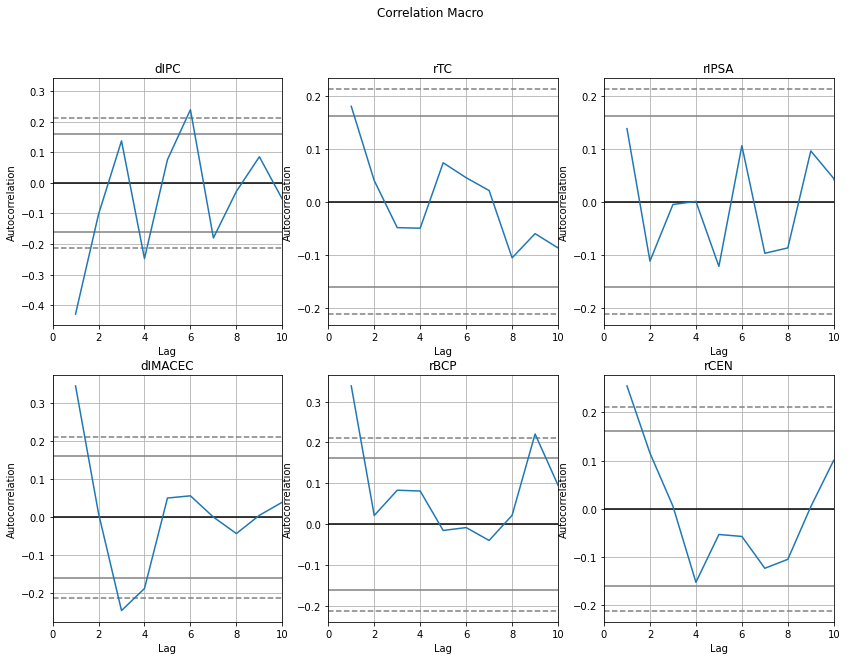

In [14]:

fig, ax = plt.subplots(2, 3)
fig.suptitle('Correlation Macro')
fig.set_figwidth(14)
fig.set_figheight(10)
j=0
k=0
for i in df_retornos.columns:
    pd.plotting.autocorrelation_plot(df_retornos[i],ax=ax[j,k])
    ax[j,k].set_title(i)
    ax[j,k].set_xlim([0,10])
    j=j+1
    if j==2:
        k=k+1
        j=0

## Multiple regression

In [16]:
X=df_retornos.drop('rCEN',axis=1)
Y=df_retornos['rCEN']

In [17]:
X=sm.add_constant(X)
model=sm.OLS(Y,X)

In [21]:
R=model.fit()

In [72]:
R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rCEN   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     37.33
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           2.66e-24
Time:                        20:06:09   Log-Likelihood:                 229.43
No. Observations:                 148   AIC:                            -446.9
Df Residuals:                     142   BIC:                            -428.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0029      0.004      0.661      0.510      -0.006       0.012
dIPC           0.0012      0.011      0.110      0.912      -0.021       0.023
dIMACEC       -0.0032      0.003     -0.943      0.347      -0.010       0.004
rTC           -0.7045      0.192     -3.669      0.000      -1.084      -0.325
rBCP          -0.5354      0.126     -4.260      0.000      -0.784      -0.287
rIPSA          0.4027      0.093      4.346      0.000       0.220       0.586
==============================================================================
Omnibus:                        0.466   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.792   Jarque-Bera (JB):                0.310
Skew:                          -0.111   Prob(JB):                        0.856
Kurtosis:                       3.038   Cond. No.                         61.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## JB: Normality

In [66]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sm.stats.jarque_bera(R.resid)
[print(x) for x in zip(name,test)]

('Jarque-Bera', 0.3101757740745043)
('Chi^2 two-tail prob.', 0.8563399129984415)
('Skew', -0.11051138434169647)
('Kurtosis', 3.038048783131282)


[None, None, None, None]

La nula es que se distribuye normal

(array([ 2.,  3.,  8., 12., 29., 36., 23., 16., 12.,  7.]),
 array([-0.14802195, -0.12177584, -0.09552973, -0.06928363, -0.04303752,
        -0.01679142,  0.00945469,  0.0357008 ,  0.0619469 ,  0.08819301,
         0.11443912]),
 <BarContainer object of 10 artists>)

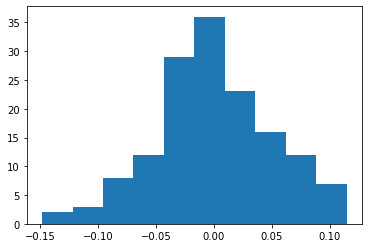

In [35]:
plt.hist(R.resid)

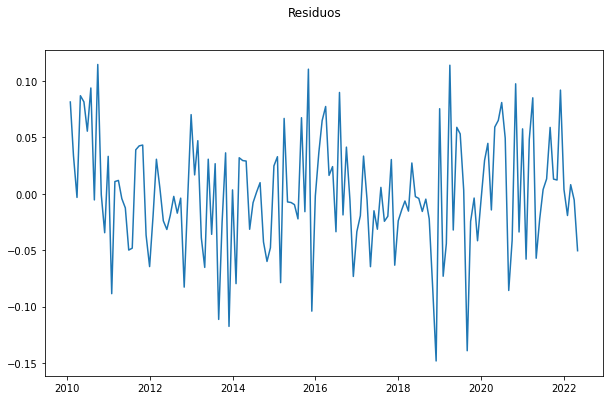

In [45]:
fig, ax = plt.subplots(1, 1)
fig.suptitle('Residuos')
fig.set_figwidth(10)
fig.set_figheight(6)
plt.plot(R.resid)

Evidentemente se justifica el rechazo de normalidad, hay clusters. 

Text(0.5, 1.0, 'ACP Residuos**2')

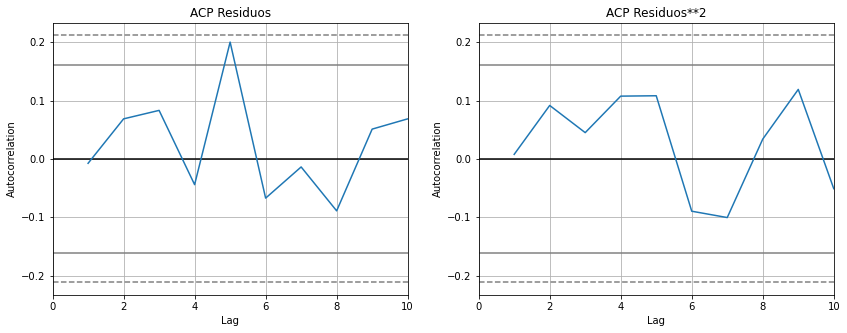

In [57]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(14)
fig.set_figheight(5)
pd.plotting.autocorrelation_plot(R.resid,ax=ax[0])
ax[0].set_xlim([0,10])
ax[0].set_title('ACP Residuos')
pd.plotting.autocorrelation_plot(R.resid**2,ax=ax[1])
ax[1].set_xlim([0,10])
ax[1].set_title('ACP Residuos**2')

No existe algo evidente en la autocorrelacion de los residuos. 

## Heteroskedasticity

In [64]:
name = ['Lagrange multiplier statistic', 'p-value',
'f-value', 'f p-value']
test = sm.stats.het_breuschpagan(R.resid, R.model.exog)
[print(x) for x in zip(name, test)]

('Lagrange multiplier statistic', 5.540876031408509)
('p-value', 0.3534844923286132)
('f-value', 1.1046037270782008)
('f p-value', 0.3606797424511952)


[None, None, None, None]

La nula es que los no residuos depende de alguna variable exogena, incluyendo las de un orden mayor. No rechazamos.

## White

In [73]:
R_white=model.fit(cov_type='HC1')

In [74]:
R_white.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rCEN   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     49.74
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           1.47e-29
Time:                        20:06:31   Log-Likelihood:                 229.43
No. Observations:                 148   AIC:                            -446.9
Df Residuals:                     142   BIC:                            -428.9
Df Model:                           5                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0029      0.005      0.648      0.517      -0.006       0.012
dIPC           0.0012      0.010      0.118      0.906      -0.019       0.021
dIMACEC       -0.0032      0.003     -1.133      0.257      -0.009       0.002
rTC           -0.7045      0.187     -3.761      0.000      -1.072      -0.337
rBCP          -0.5354      0.122     -4.401      0.000      -0.774      -0.297
rIPSA          0.4027      0.095      4.237      0.000       0.216       0.589
==============================================================================
Omnibus:                        0.466   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.792   Jarque-Bera (JB):                0.310
Skew:                          -0.111   Prob(JB):                        0.856
Kurtosis:                       3.038   Cond. No.                         61.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

## Newey-west

In [80]:
R_NW=model.fit(cov_type='HAC',cov_kwds={'maxlags':5,'use_correction':True})

In [82]:
R_NW.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rCEN   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     57.35
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           2.15e-32
Time:                        20:08:53   Log-Likelihood:                 229.43
No. Observations:                 148   AIC:                            -446.9
Df Residuals:                     142   BIC:                            -428.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0029      0.005      0.575      0.566      -0.007       0.013
dIPC           0.0012      0.011      0.114      0.909      -0.020       0.022
dIMACEC       -0.0032      0.003     -1.215      0.224      -0.008       0.002
rTC           -0.7045      0.184     -3.824      0.000      -1.066      -0.343
rBCP          -0.5354      0.133     -4.027      0.000      -0.796      -0.275
rIPSA          0.4027      0.100      4.037      0.000       0.207       0.598
==============================================================================
Omnibus:                        0.466   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.792   Jarque-Bera (JB):                0.310
Skew:                          -0.111   Prob(JB):                        0.856
Kurtosis:                       3.038   Cond. No.                         61.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 5 lags and with small sample correction
"""

## Durbin - Watson

Existe autocorrelacion de primer orden?

In [83]:
sm.stats.durbin_watson(R.resid)

1.9916835198445215

Un valor tan cercano a dos podría indicar que no existe autocorrelacion.

## Breusch-Godfrey

In [88]:
name_BG = ['Lagrange multiplier statistic', 'p-value',
'f-value', 'f p-value']
test_BG = sm.stats.acorr_breusch_godfrey(R, 10)
[print(x) for x in zip(name, test_BG)]

('Jarque-Bera', 12.253863355181192)
('Chi^2 two-tail prob.', 0.2684256366532802)
('Skew', 1.1915697955486972)
('Kurtosis', 0.3022150554009129)


[None, None, None, None]

Si no me equivoco lo que hace es regresionar los residuos contra sus rezagos. La nula es que no existe autocorrelacion de ningun orden. No rechazamos.
